<a href="https://colab.research.google.com/github/Hossain-MD-Rafat/covid19_image_classification/blob/main/High_Code_COVID_19_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: COVID-19 Image Classification

## Problem Statement

### Context

Covid-19 is a fast-growing disease that affects human health severly. Patients diagonised with this condition suffers from lung infection. The medical community has recently released vaccines which have a slower effect in increasing the immunity. This virus has impacted various countries' human health and financial standing.

Deep learning algorithms have recently used image classification to identify medical images. Convolutional Neural Networks (CNN) can be widely utilized to identify COVID-19 to assist radiologists in medical analysis by classifying patients who are healthy, have viral pneumonia, or are affected by COVID using X-ray pictures of the lungs.

### Objective

The aim of this project is to Build a Convolutional Neural Network to differentiate an X-ray image of a person affected with covid from that of a healthy person or a person who has viral pneumonia(fever).

### Data Dictionary

- This dataset contains training set images of 3 classes which are converted into numpy arrays.

- The dataset comprises 3 classes:
  - COVID-19: The patient who is effected due to covid.
  - Viral Pneumonia: This is a viral fever which has similar characteristics like fever and cought that of Covid but is not covid.
  
  - Normal- A healthy Person with no symptoms of covid or fever.
- The data file names are:
  - CovidImages.npy
  - CovidLabels.csv

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [ ]:
#Installing the libraries with the specified version.
#uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importing matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
#from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images = np.load("/content/drive/MyDrive/pgd_aiml/covid_classification/CovidImages.npy")
labels = pd.read_csv("/content/drive/MyDrive/pgd_aiml/covid_classification/CovidLabels.csv")

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(251, 128, 128, 3)
(251, 1)




*   The dataset contains only 251 records.



## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category X-ray images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

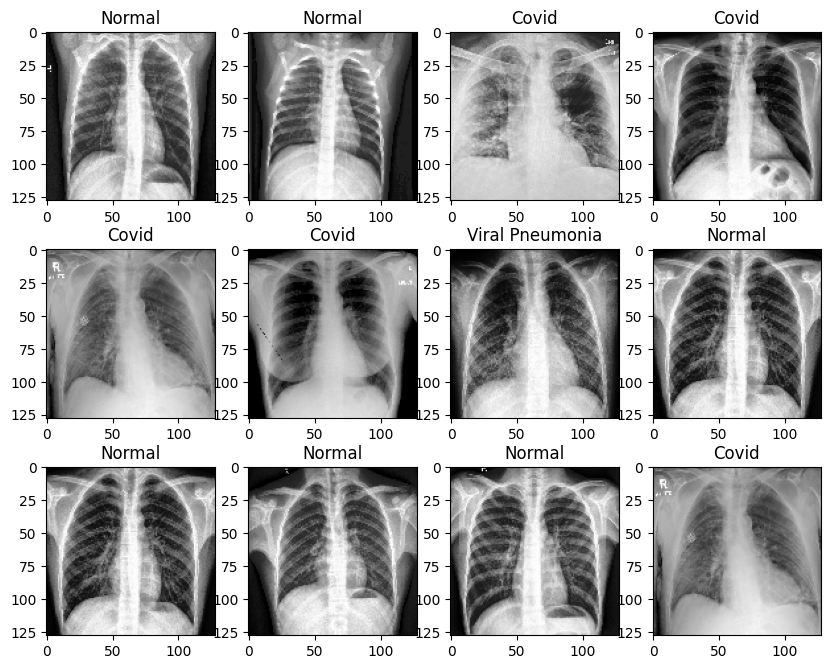

In [ ]:
plot_images(images,labels)

([0, 1, 2],
 [Text(0, 0, 'Viral Pneumonia'), Text(1, 0, 'Covid'), Text(2, 0, 'Normal')])

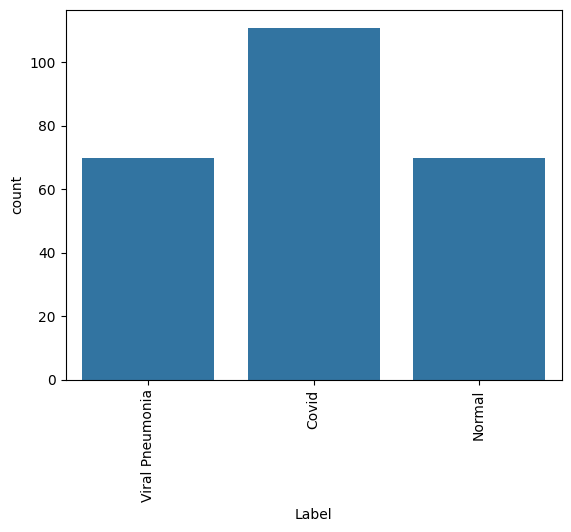

In [ ]:
sns.countplot(x=labels['Label'])     #visualizing the data distribution among the three conditions
plt.xticks(rotation='vertical')



*   The dataset is imbalanced where covid condition has the highest number of images.



## Data Pre-Processing

### Converting the BGR images to RGB images

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64                    # defining the height as 64
width = 64                   # defining the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

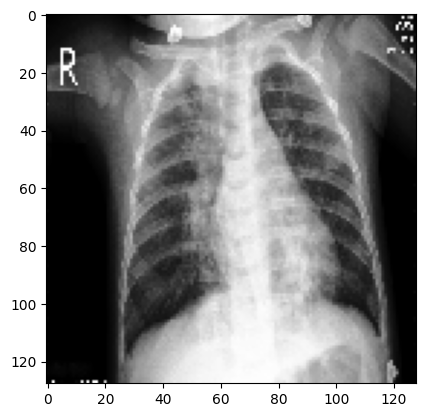

In [ ]:
plt.imshow(images[3])

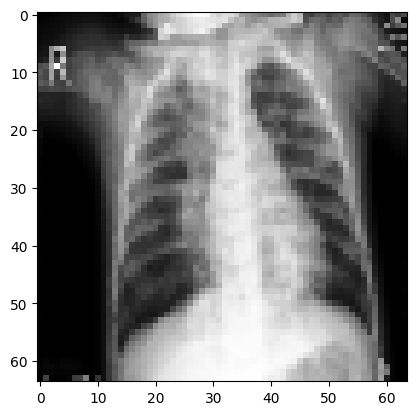

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels['Label'], test_size=0.1, random_state=42,stratify=labels) # splittig the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp) # splittig the data with test_size as 0.1

### Encode the target labels

In [ ]:
# Convert labels from names to one hot vectors.
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded.shape
y_val_encoded.shape
y_test_encoded.shape

(26, 3)

### Data Normalization

In [ ]:
#normalizing the images
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [ ]:
#Clearing the background
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#initializing the sequential model
model = Sequential()

#adding the conv layer with 64 filters of 3X3 kernel size,
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same', input_shape=(64,64,3)))
#adding the maxpooling layer to keep important features while reducing the shape
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

#adding flatten layer to flattening the output from the last maxpooling layer
model.add(Flatten())

#adding the dense layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#adding the dense layer with 32 neurons and relu activation
model.add(Dense(32,activation='relu'))

#adding the dense layer with 3 neurons and softmax activation
model.add(Dense(3,activation='softmax'))


In [ ]:
#adding adam optimizer to model
opt=Adam(learning_rate=0.001)
#compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
history = model.fit(X_train_normalized, y_train_encoded, batch_size=32, epochs=30, validation_data=(X_val_normalized, y_val_encoded), verbose=2)

Epoch 1/30
7/7 - 4s - loss: 1.0446 - accuracy: 0.4455 - val_loss: 0.9231 - val_accuracy: 0.6957 - 4s/epoch - 525ms/step
Epoch 2/30
7/7 - 0s - loss: 0.8371 - accuracy: 0.6139 - val_loss: 0.5562 - val_accuracy: 0.7826 - 196ms/epoch - 28ms/step
Epoch 3/30
7/7 - 0s - loss: 0.4385 - accuracy: 0.8713 - val_loss: 0.3417 - val_accuracy: 0.8696 - 298ms/epoch - 43ms/step
Epoch 4/30
7/7 - 0s - loss: 0.3498 - accuracy: 0.8614 - val_loss: 0.2364 - val_accuracy: 0.9565 - 320ms/epoch - 46ms/step
Epoch 5/30
7/7 - 0s - loss: 0.2457 - accuracy: 0.9158 - val_loss: 0.2015 - val_accuracy: 0.9130 - 266ms/epoch - 38ms/step
Epoch 6/30
7/7 - 0s - loss: 0.2107 - accuracy: 0.9257 - val_loss: 0.3971 - val_accuracy: 0.9130 - 204ms/epoch - 29ms/step
Epoch 7/30
7/7 - 0s - loss: 0.3346 - accuracy: 0.8713 - val_loss: 0.1369 - val_accuracy: 0.9565 - 185ms/epoch - 26ms/step
Epoch 8/30
7/7 - 0s - loss: 0.1521 - accuracy: 0.9406 - val_loss: 0.1783 - val_accuracy: 0.9565 - 162ms/epoch - 23ms/step
Epoch 9/30
7/7 - 0s - loss

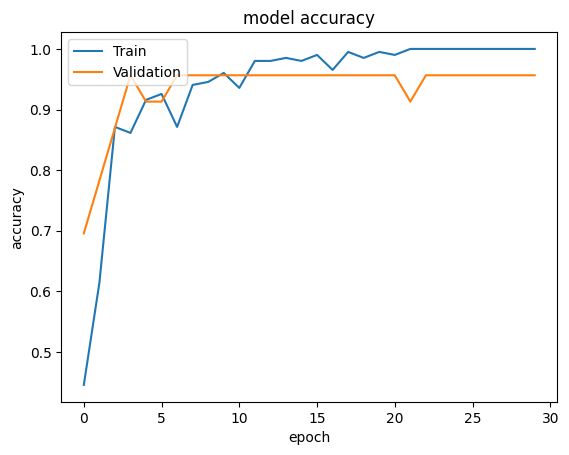

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



*   The base model performs extremely well both in training and validation dataset.
*   It shows a smooth convergence during training.



In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

1/1 - 0s - loss: 0.0368 - accuracy: 1.0000 - 33ms/epoch - 33ms/step




*   The model accuracy on testing dataset is 100%.



In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

1/1 [==============================] - 0s 211ms/step


In [ ]:
y_pred

array([[5.21340439e-07, 3.54977828e-07, 9.99999166e-01],
       [1.00000000e+00, 5.82745074e-10, 6.56232535e-09],
       [9.99839187e-01, 8.74260473e-12, 1.60819924e-04],
       [9.99898553e-01, 1.02024984e-08, 1.01439684e-04],
       [7.89247512e-09, 9.99975324e-01, 2.47348162e-05],
       [1.00000000e+00, 3.05253911e-09, 1.79970172e-09],
       [9.98189509e-01, 2.69387929e-05, 1.78361323e-03],
       [1.69352032e-04, 9.95247543e-01, 4.58322093e-03],
       [2.47584134e-01, 7.19107687e-01, 3.33081670e-02],
       [1.00000000e+00, 4.13010026e-09, 1.49038104e-09],
       [1.09908761e-07, 2.12160812e-05, 9.99978662e-01],
       [1.00000000e+00, 7.21305567e-12, 3.69313753e-08],
       [2.98006082e-04, 9.99699831e-01, 2.20309585e-06],
       [2.85384044e-06, 2.45884706e-07, 9.99996901e-01],
       [3.10748487e-06, 9.13853571e-02, 9.08611536e-01],
       [2.65659832e-08, 3.99637565e-06, 9.99995947e-01],
       [1.00000000e+00, 1.27362625e-13, 2.25509477e-12],
       [1.00000000e+00, 1.16305

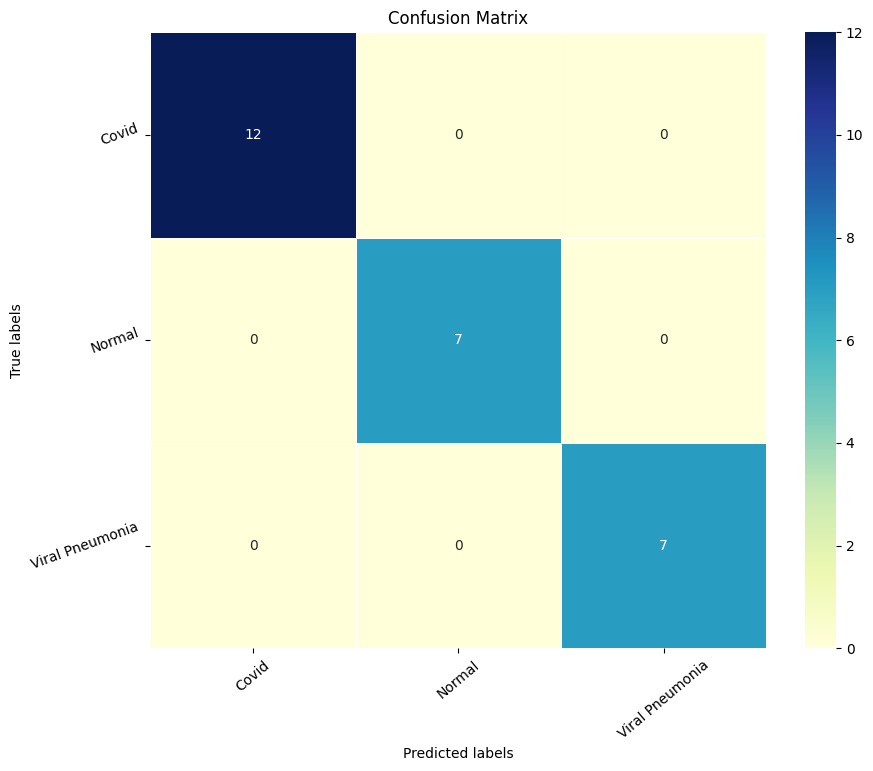

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    cmap="YlGnBu",
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [ ]:
from sklearn import metrics
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(32, activation='relu'))
# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(3, activation='softmax'))

opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1)

Epoch 1/30
3/3 [==============================] - 3s 142ms/step - loss: 1.0741 - accuracy: 0.4275 - val_loss: 1.0661 - val_accuracy: 0.4348
Epoch 2/30
3/3 [==============================] - 0s 71ms/step - loss: 1.0144 - accuracy: 0.5362 - val_loss: 1.1007 - val_accuracy: 0.3043
Epoch 3/30
3/3 [==============================] - 0s 89ms/step - loss: 1.0789 - accuracy: 0.4167 - val_loss: 0.9122 - val_accuracy: 0.8696
Epoch 4/30
3/3 [==============================] - 0s 70ms/step - loss: 0.9832 - accuracy: 0.5507 - val_loss: 0.8047 - val_accuracy: 0.7391
Epoch 5/30
3/3 [==============================] - 0s 60ms/step - loss: 0.8469 - accuracy: 0.6232 - val_loss: 0.7780 - val_accuracy: 0.6957
Epoch 6/30
3/3 [==============================] - 0s 88ms/step - loss: 0.7580 - accuracy: 0.6562 - val_loss: 0.6394 - val_accuracy: 0.6522
Epoch 7/30
3/3 [==============================] - 0s 69ms/step - loss: 0.6362 - accuracy: 0.7246 - val_loss: 0.5335 - val_accuracy: 0.8261
Epoch 8/30
3/3 [==========

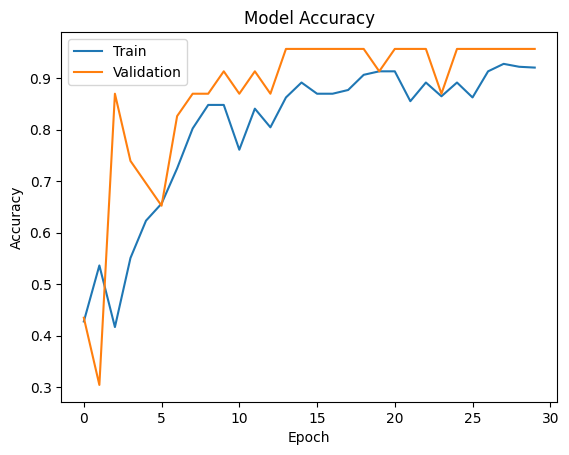

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

1/1 - 0s - loss: 0.1664 - accuracy: 0.8846 - 22ms/epoch - 22ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

1/1 [==============================] - 0s 70ms/step


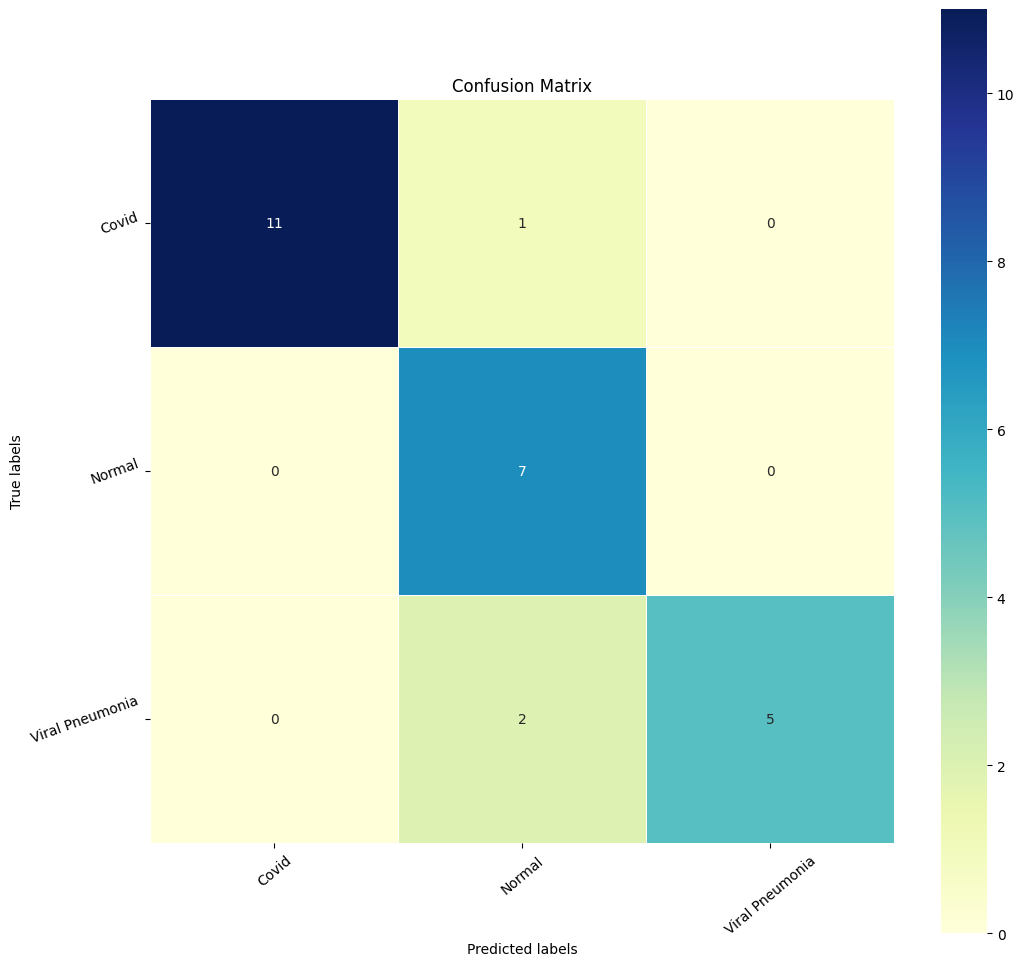

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    cmap="YlGnBu",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [ ]:
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.70      1.00      0.82         7
           2       1.00      0.71      0.83         7

    accuracy                           0.88        26
   macro avg       0.90      0.88      0.87        26
weighted avg       0.92      0.88      0.89        26



In [ ]:
del model2
del history2

## Tranfer Learning

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model3.add(Flatten())

# Adding a dense output layer
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(3, activation='softmax'))
opt=Adam(learning_rate=0.001)
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 14848003 (56.64 MB)
Trainable params: 1333

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history3 = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
3/3 [==============================] - 2s 214ms/step - loss: 1.0959 - accuracy: 0.4375 - val_loss: 0.9515 - val_accuracy: 0.4348
Epoch 2/30
3/3 [==============================] - 0s 80ms/step - loss: 0.9115 - accuracy: 0.5145 - val_loss: 0.8050 - val_accuracy: 0.6087
Epoch 3/30
3/3 [==============================] - 0s 84ms/step - loss: 0.7779 - accuracy: 0.7609 - val_loss: 0.7215 - val_accuracy: 0.8261
Epoch 4/30
3/3 [==============================] - 0s 107ms/step - loss: 0.6748 - accuracy: 0.7917 - val_loss: 0.5789 - val_accuracy: 0.8261
Epoch 5/30
3/3 [==============================] - 0s 88ms/step - loss: 0.5186 - accuracy: 0.8913 - val_loss: 0.5111 - val_accuracy: 0.7826
Epoch 6/30
3/3 [==============================] - 0s 102ms/step - loss: 0.5015 - accuracy: 0.8542 - val_loss: 0.4338 - val_accuracy: 0.8696
Epoch 7/30
3/3 [==============================] - 0s 97ms/step - loss: 0.5113 - accuracy: 0.8551 - val_loss: 0.4069 - val_accuracy: 0.8696
Epoch 8/30
3/3 [========

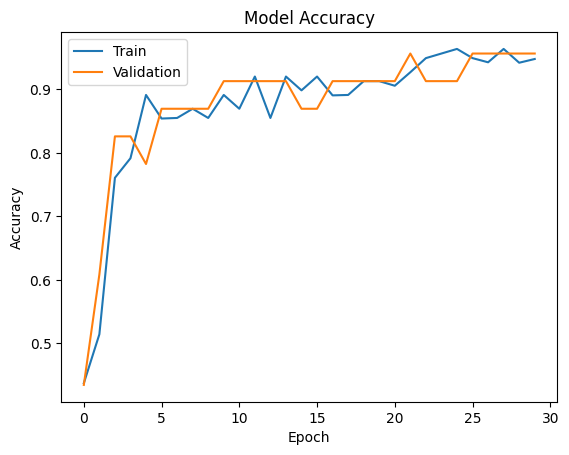

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

1/1 - 0s - loss: 0.2148 - accuracy: 0.8846 - 40ms/epoch - 40ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

1/1 [==============================] - 0s 142ms/step


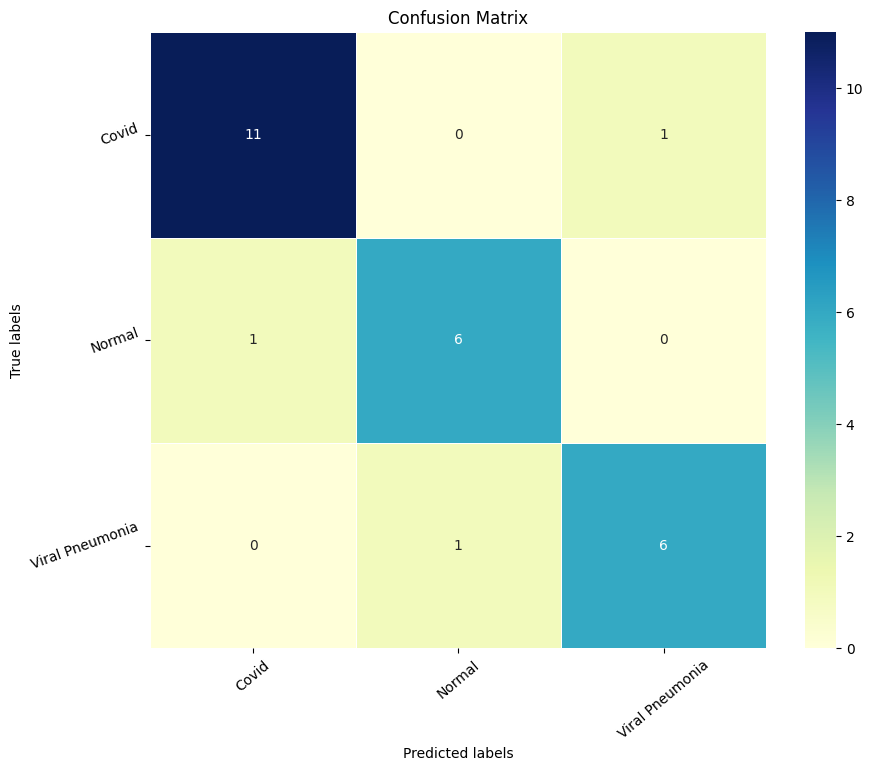

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    cmap="YlGnBu",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [ ]:
del model3
del history3

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [ ]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['100%','92%','94%'],'Validation Accuracy':['95%','95%','95%'],'Test Accuracy':['100%','88%','88%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,100%,95%,100%
1,CNN Model with Data Augmentation,89%,95%,88%
2,Transfer Learning Model,81%,91%,92%


### Visualizing the prediction

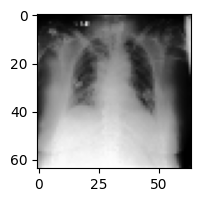

1/1 [==============================] - 0s 37ms/step
Predicted Label ['Covid']
True Label Covid


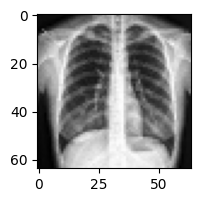

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Normal']
True Label Normal


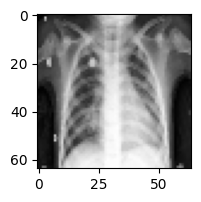

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Viral Pneumonia']
True Label Viral Pneumonia


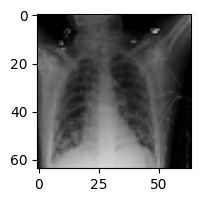

1/1 [==============================] - 0s 23ms/step
Predicted Label ['Covid']
True Label Covid


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[12])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[12].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[12])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[19],)
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[19].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[19])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[6])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[6].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[6])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations



*   The base model gives the highest accuracy.

*   The model with augmetation was expected performing better but it was unable to predict viral pneumonia so perfectly.
*   The last model of vgg16 shows a nice convergence curve which indicates a better training.


*   Though all the models performed well but the dataset is small which tends that the models might not be robust enough.



_____